# Full simulations to estimate input distributions in multistable network

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from disp import set_plot

In [2]:
from ntwk import SoftmaxNtwk

In [3]:
def get_active(ths, t_1):
    ths_mn = ths[t_1:, :].mean(0)  # ppln time average
    matv = ths_mn > np.max(ths_mn/2)  # mask over active labels
    iatv = matv.nonzero()[0]  # idxs of active labels
    return iatv

In [4]:
N = 3000
D = 16
mself = np.eye(D, dtype=bool)

t_max = 200

## Fluctuation-driven multistable network

In [5]:
MU_J_SELF = 0
MU_J_CROSS = 0
SGM_J_SELF = 1
SGM_J_CROSS = .05

SGM_J = np.nan*np.zeros((D, D))
MU_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS

J = np.nan*np.zeros((D, D, N, N))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

ntwk = SoftmaxNtwk(J)

x_0 = np.random.randn(N, D)
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)

ths = ys.mean(axis=1)

.........

First active: 2
First quiet: 0


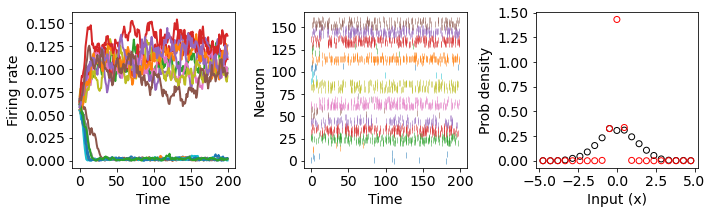

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)

# activations
axs[0].plot(ths, lw=2)

nplot_cotuned = 10

for d in range(D):
    inrns = np.random.permutation(N)[:nplot_cotuned]
    tspks, cspks = ys[:, inrns, d].nonzero()
    axs[1].scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=.5)
    
set_plot(axs[0], x_label='Time', y_label='Firing rate', font_size=14)
set_plot(axs[1], x_label='Time', y_label='Neuron', font_size=14)

iatv = get_active(ths, t_1=150)
iqui = [d for d in range(D) if d not in iatv]

print('First active:', iatv[0])
print('First quiet:', iqui[0])

x_atv = xs[-1, :, iatv[0]]
x_qui = xs[-1, :, iqui[0]]

bins = np.linspace(-5, 5, 22)
binc = .5*(bins[:-1] + bins[1:])

cts_atv = np.histogram(x_atv, bins, density=True)[0]
cts_qui = np.histogram(x_qui, bins, density=True)[0]

axs[2].scatter(binc, cts_atv, facecolors='none', edgecolors='k')
axs[2].scatter(binc, cts_qui, facecolors='none', edgecolors='r')

set_plot(axs[2], x_label='Input (x)', y_label='Prob density', font_size=14)

In [8]:
np.save('data/multistability/inputs.npy', np.array([{
    't': t,
    'xs': xs,
    'ys': ys,
    'bins': bins,
    'binc': binc,
    'iatv': iatv,
    'iqui': iqui,
    'cts_atv': cts_atv,
    'cts_qui': cts_qui,
}]))